In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [9]:
cc = pd.read_csv('../../data/CC GENERAL.csv')
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## EDA and preprocessing

In [11]:
# Check for missing values
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:xlabel='MINIMUM_PAYMENTS'>

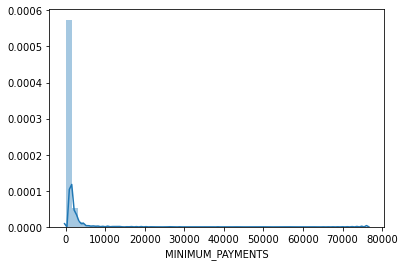

In [21]:
# Investigate missing value for minimum payments
sns.distplot(cc['MINIMUM_PAYMENTS'])

In [24]:
cc[cc['MINIMUM_PAYMENTS'].isnull()].head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.0,0.0,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.9,1283.9,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12


In [26]:
# Find the variable that correlates most positively with Minimum Payments to use as a possible substitute 
cc.corr()['MINIMUM_PAYMENTS']
# Not going to work

BALANCE                             0.398684
BALANCE_FREQUENCY                   0.132569
PURCHASES                           0.093860
ONEOFF_PURCHASES                    0.048755
INSTALLMENTS_PURCHASES              0.132172
CASH_ADVANCE                        0.140107
PURCHASES_FREQUENCY                 0.003030
ONEOFF_PURCHASES_FREQUENCY         -0.030327
PURCHASES_INSTALLMENTS_FREQUENCY    0.030073
CASH_ADVANCE_FREQUENCY              0.098838
CASH_ADVANCE_TRX                    0.109739
PURCHASES_TRX                       0.096333
CREDIT_LIMIT                        0.126671
PAYMENTS                            0.126651
MINIMUM_PAYMENTS                    1.000000
PRC_FULL_PAYMENT                   -0.140379
TENURE                              0.059444
Name: MINIMUM_PAYMENTS, dtype: float64

<AxesSubplot:xlabel='MINIMUM_PAYMENTS'>

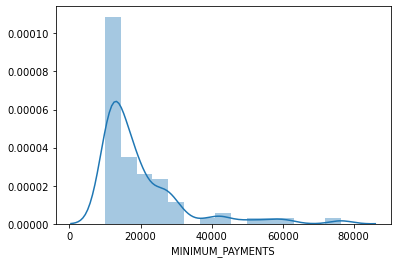

In [33]:
# Examine again to look closer at distribution without the outliers
sns.distplot(cc[cc['MINIMUM_PAYMENTS'] >= 10000]['MINIMUM_PAYMENTS'])

In [32]:
cc[cc['MINIMUM_PAYMENTS'] >= 10000]['MINIMUM_PAYMENTS']

19      12465.54938
20      13557.29726
34      17862.55831
138     18621.01331
150     12854.93970
           ...     
8251    12748.98306
8274    11795.28096
8470    10729.19416
8688    13916.08593
8724    16638.73385
Name: MINIMUM_PAYMENTS, Length: 77, dtype: float64

In [47]:
# Replace missing values for MINIMUM_PAYMENTS with the median since distribution is skewed a bit
min_imp = SimpleImputer(missing_values=np.nan, strategy='median')
cc['MINIMUM_PAYMENTS'] = min_imp.fit_transform(cc['MINIMUM_PAYMENTS'].values.reshape(-1, 1))

In [61]:
# Since it is only one record, drop it from the data
cc = cc[cc['CREDIT_LIMIT'].notna()]

#Drop the CUST_ID columns since it's only an identifier
cc = cc.drop('CUST_ID', axis=1)

In [68]:
def preprocess_cc(df):
    """ Use this later to perform all the preprocessing across models when trying different features. """
    min_imp = SimpleImputer(missing_values=np.nan, strategy='median')
    cc['MINIMUM_PAYMENTS'] = min_imp.fit_transform(cc['MINIMUM_PAYMENTS'].values.reshape(-1, 1))
    cc = cc.drop('CUST_ID', axis=1)
    z_score = np.abs(stats.zscore(cc))
    ub = 3
    cc = cc[(z_score <ub).all(axis=1)]
    return df

In [62]:
cc.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<AxesSubplot:>

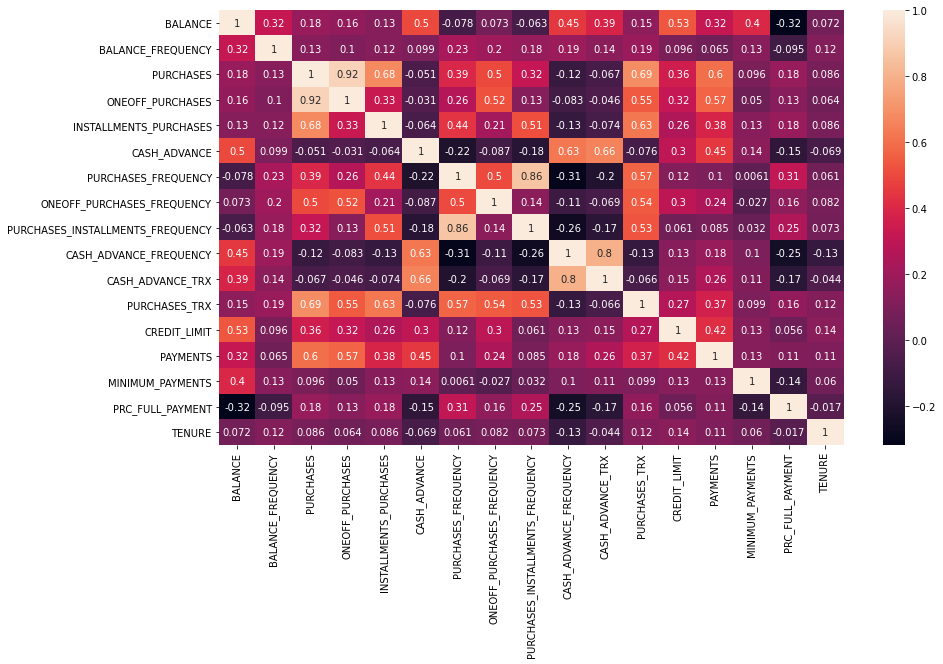

In [63]:
plt.figure(figsize=(14,8))
sns.heatmap(cc.corr(), annot=True)

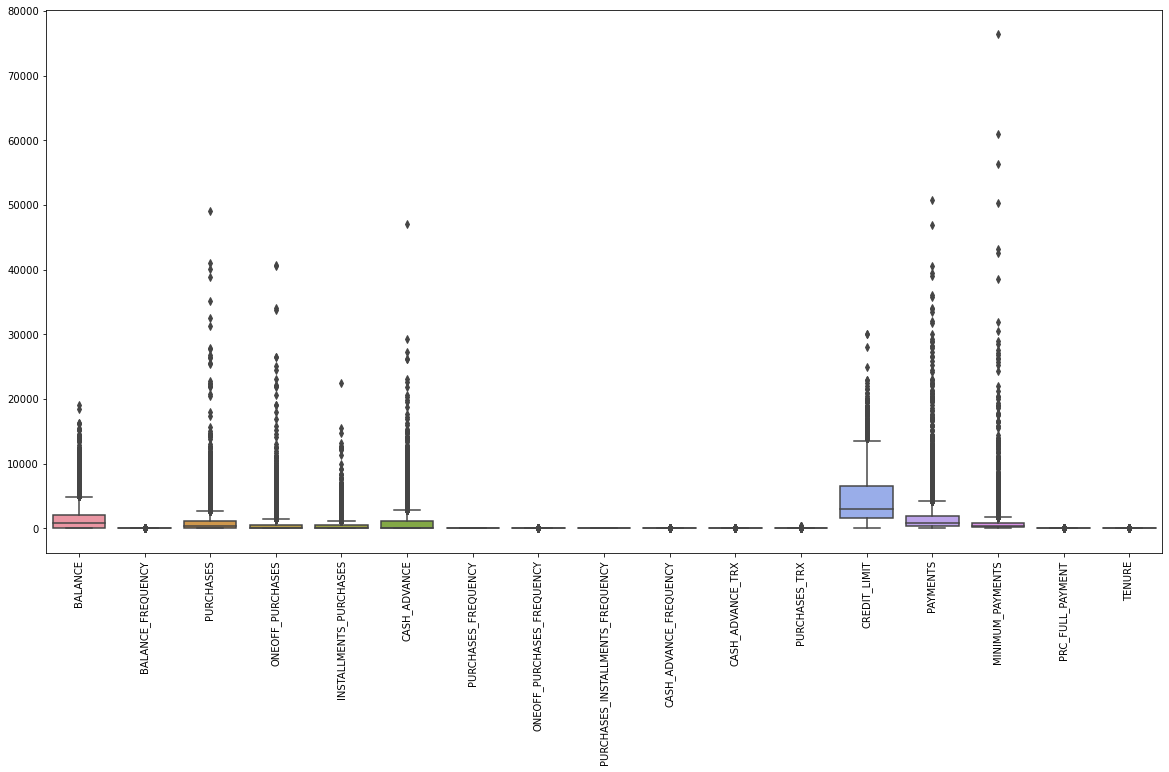

In [73]:
# Examine Outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=cc)
plt.xticks(rotation=90)
plt.show()

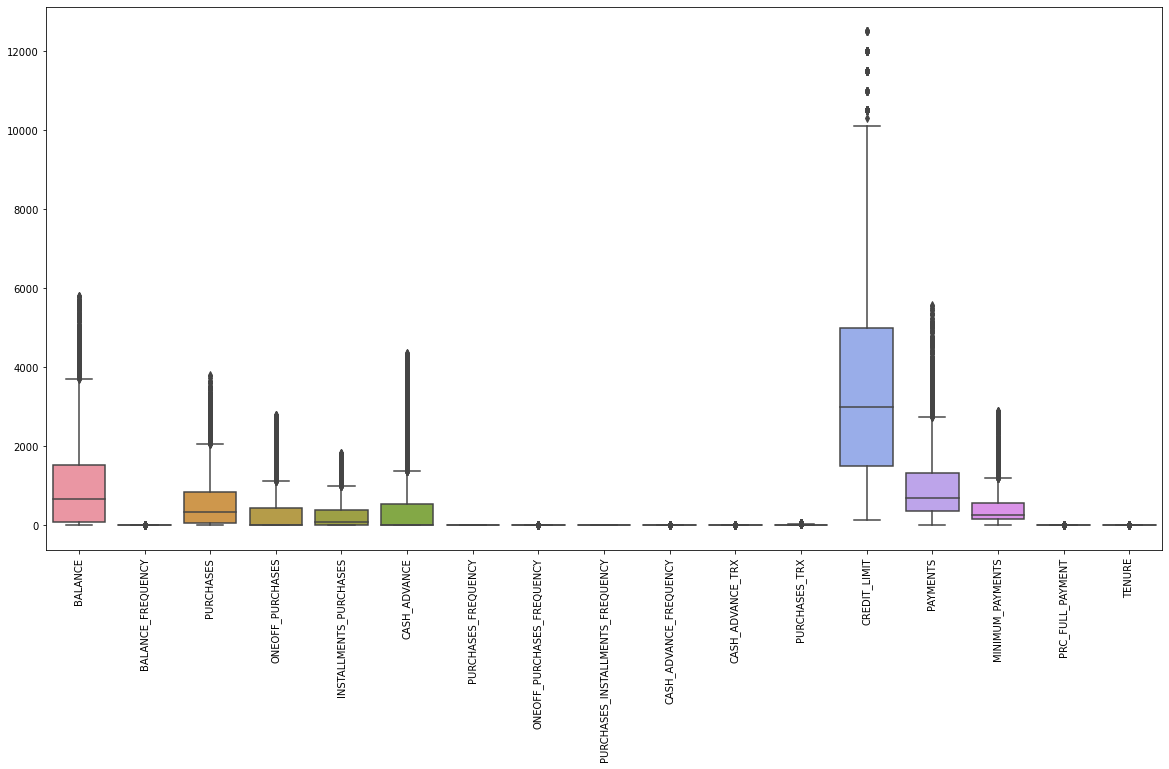

In [88]:
z_score = np.abs(stats.zscore(cc))
ub = 3
cc = cc[(z_score <ub).all(axis=1)]

# Examine Outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=cc)
plt.xticks(rotation=90)
plt.show()

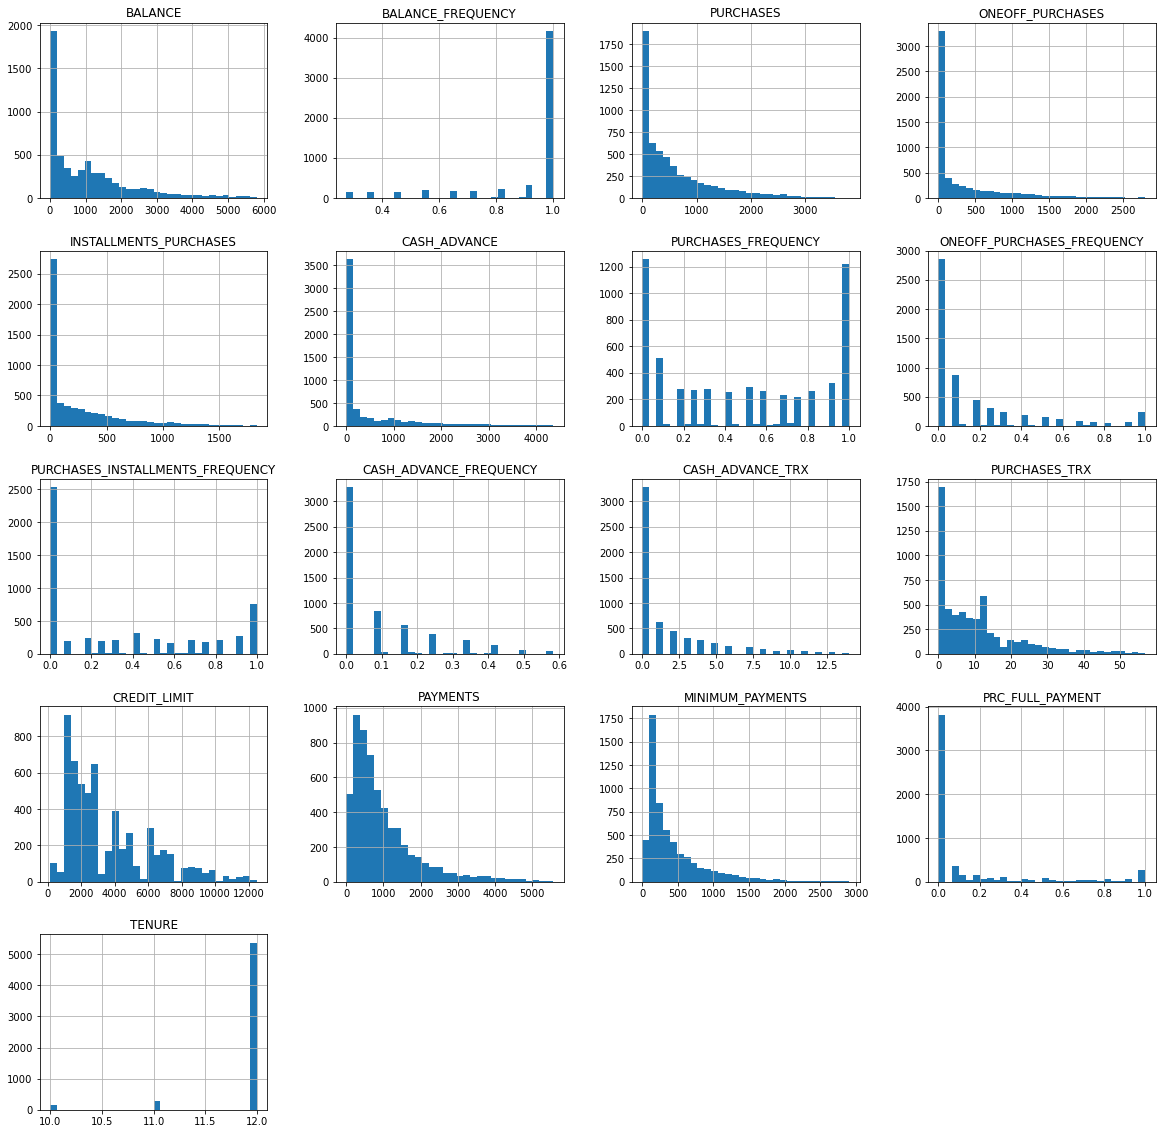

In [96]:
# Examine Distributions with the now removed outliers
cc.hist(bins=30, figsize=(20,20))
plt.show()

In [99]:
# Scale the Data
sc = StandardScaler()
X = sc.fit_transform(cc)

## KMeans Model

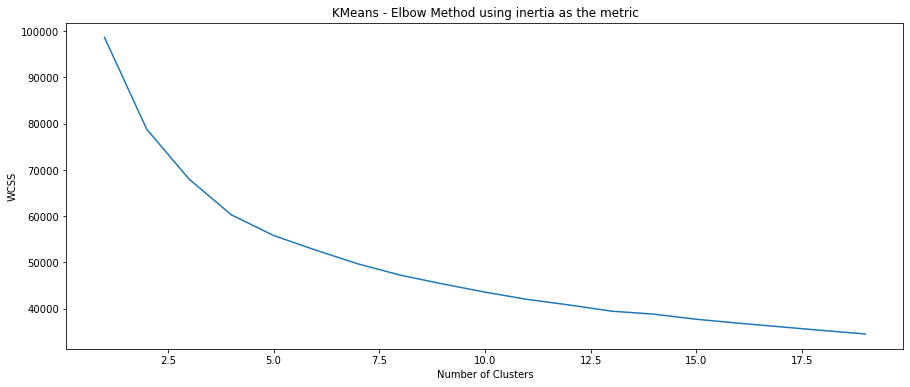

In [162]:
wcss = []

for i in range(1,20):
    kmeans= KMeans(n_clusters=i, init='k-means++', max_iter=100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(15,6))
plt.plot(range(1,20), wcss)   
plt.title('KMeans - Elbow Method using inertia as the metric')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

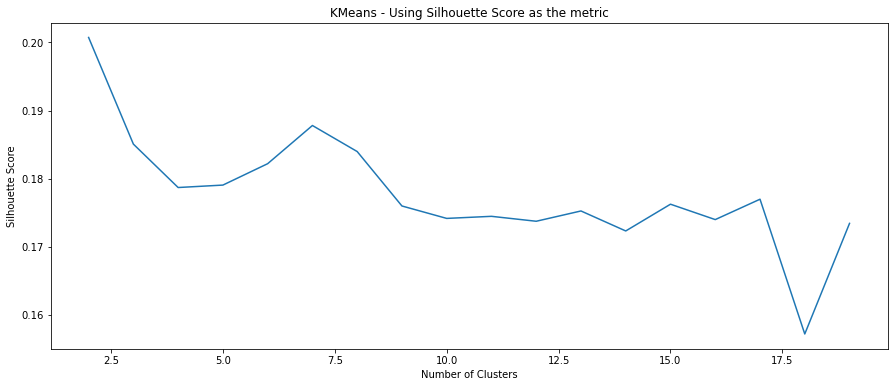

In [163]:
# Examine silhouette score
silhouette = []

for i in range(2,20):
    kmeans= KMeans(n_clusters=i, init='k-means++', max_iter=100)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette.append(score)

plt.figure(figsize=(15,6))
plt.plot(range(2,20), silhouette)   
plt.title('KMeans - Using Silhouette Score as the metric')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# +1 - Instance is well inside its own cluster
#  0 - Instance is close to a cluster boundary
# -1 - Instance may be assigned wrong cluster



In [178]:
kmeans= KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)

labels = kmeans.labels_
cc['CLUSTER_ID'] = labels

<AxesSubplot:xlabel='PRC_FULL_PAYMENT', ylabel='CREDIT_LIMIT'>

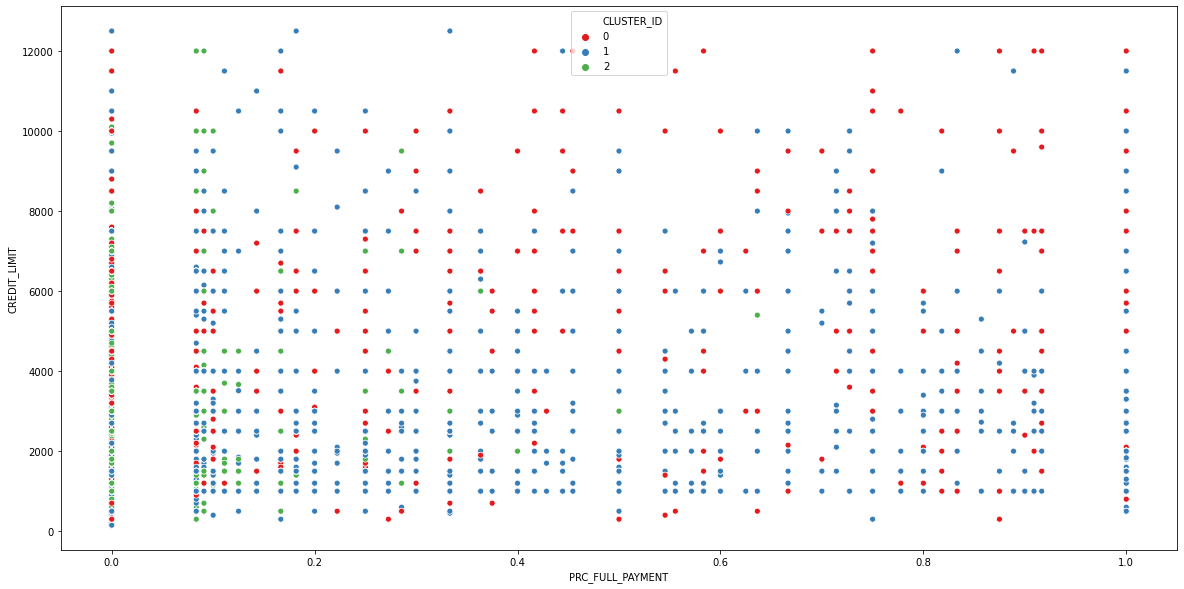

In [183]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cc, x='PRC_FULL_PAYMENT', y ='CREDIT_LIMIT', hue='CLUSTER_ID', palette= 'Set1')